In [14]:
# Import required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_patient = pd.read_csv('patient.csv',index_col=0)

display(df_patient)


,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
patient_id,,,,,,,,,,
1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan
...,...,...,...,...,...,...,...,...,...,...
889,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
890,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
891,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN


In [16]:
df_patient.describe(include='all')

,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
count,156,156.000000,156,156,166,27.000000,893,5,4,17
unique,2,NaN,2,10,3,NaN,20,3,2,4
top,male,NaN,indonesia,DKI Jakarta,isolated,NaN,24-Mar-20,11-Mar-20,12-Mar-20,RSPI Sulianti Saroso
freq,91,NaN,147,124,143,NaN,106,2,2,8
mean,NaN,48.108974,NaN,NaN,NaN,30.555556,NaN,NaN,NaN,NaN
std,NaN,16.627833,NaN,NaN,NaN,36.051601,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,36.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,49.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,59.000000,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,NaN


In [17]:
df_patient.dtypes

gender             object
age               float64
nationality        object
province           object
current_state      object
contacted_with    float64
confirmed_date     object
released_date      object
deceased_date      object
hospital           object
dtype: object

In [18]:
df_patient.isnull().sum()

gender            737
age               737
nationality       737
province          737
current_state     727
contacted_with    866
confirmed_date      0
released_date     888
deceased_date     889
hospital          876
dtype: int64

In [19]:
# Take only required column

df_patient = df_patient[[
    'gender',
    'age',
    'nationality',
    'province',
    'current_state',
    'confirmed_date',
    'released_date',
    'deceased_date'
]]

df_patient['confirmed_date'] = pd.to_datetime(df_patient['confirmed_date'])

bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
df_patient['age_group'] = pd.cut(df_patient['age'], bins=bins, labels=labels, right=False)

df_patient['age'].value_counts().to_dict()

{43.0: 7,
 55.0: 7,
 56.0: 6,
 40.0: 5,
 50.0: 5,
 65.0: 5,
 34.0: 5,
 36.0: 5,
 29.0: 4,
 51.0: 4,
 70.0: 4,
 54.0: 4,
 48.0: 4,
 64.0: 3,
 59.0: 3,
 44.0: 3,
 22.0: 3,
 66.0: 3,
 80.0: 3,
 57.0: 3,
 52.0: 3,
 49.0: 3,
 28.0: 3,
 46.0: 3,
 74.0: 3,
 67.0: 3,
 31.0: 3,
 45.0: 2,
 37.0: 2,
 61.0: 2,
 30.0: 2,
 27.0: 2,
 26.0: 2,
 58.0: 2,
 25.0: 2,
 38.0: 2,
 33.0: 2,
 42.0: 2,
 39.0: 2,
 72.0: 2,
 32.0: 2,
 73.0: 2,
 17.0: 1,
 16.0: 1,
 47.0: 1,
 19.0: 1,
 53.0: 1,
 85.0: 1,
 71.0: 1,
 3.0: 1,
 60.0: 1,
 24.0: 1,
 2.0: 1,
 63.0: 1,
 69.0: 1,
 86.0: 1,
 68.0: 1,
 78.0: 1,
 20.0: 1,
 41.0: 1,
 35.0: 1}

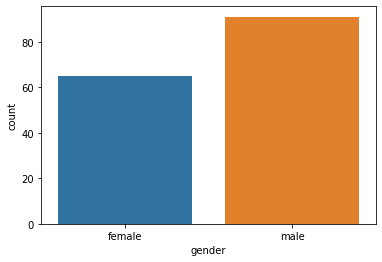

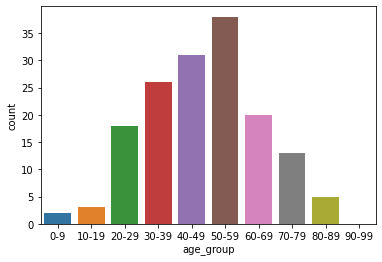

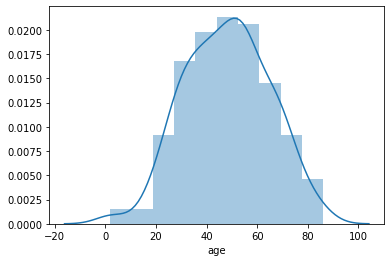

In [20]:
sns.countplot(x='gender',data=df_patient)
plt.show()

sns.countplot(x='age_group',data=df_patient)
plt.show()

sns.distplot(df_patient['age'])
plt.show()

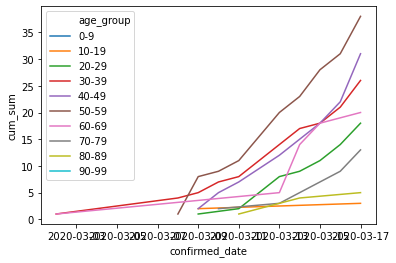

NameError: name 'df_clean_age_gender' is not defined

In [23]:
time_age = df_patient.groupby(['confirmed_date','age_group']).size().reset_index(name='count')
time_age['cum_sum'] = time_age.groupby(['age_group'])['count'].cumsum()
time_age['cum_perc'] = 100*time_age['cum_sum']/time_age['count'].sum()
sns.lineplot(x='confirmed_date',y='cum_sum',hue_order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'],hue='age_group',data=time_age)
plt.show()

time_gender = df_patient.groupby(['confirmed_date','gender']).size().reset_index(name='count')
time_gender['cum_sum'] = time_gender.groupby(['gender'])['count'].cumsum()
time_gender['cum_perc'] = 100*time_gender['cum_sum']/time_gender['count'].sum()
sns.lineplot(x='confirmed_date',y='cum_sum',hue='gender',data=time_gender)
plt.show()